In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import sampler as sp

In [2]:
train_stat = pd.read_csv('./sep_data/train_scaled_stat_feat_df.csv')
dev_stat = pd.read_csv('./sep_data/dev_scaled_stat_feat_df.csv')

train_tweet = pd.read_csv('./sep_data/train_tweet_df.csv')
dev_tweet = pd.read_csv('./sep_data/dev_tweet_df.csv')

train_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1579 non-null   int64  
 1   reply_contributors                   1579 non-null   float64
 2   reply_possibly_sensitive             1579 non-null   float64
 3   reply_possibly_sensitive_appealable  1579 non-null   float64
 4   reply_retweet_count                  1579 non-null   float64
 5   reply_favorite_count                 1579 non-null   float64
 6   reply_mentioned_url_num              1579 non-null   float64
 7   reply_id_num                         1579 non-null   float64
 8   reply_followers_count                1579 non-null   float64
 9   reply_friends_count                  1579 non-null   float64
 10  reply_listed_count                   1579 non-null   float64
 11  reply_favourites_count        

In [3]:
dev_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           536 non-null    int64  
 1   reply_contributors                   536 non-null    float64
 2   reply_possibly_sensitive             536 non-null    float64
 3   reply_possibly_sensitive_appealable  536 non-null    float64
 4   reply_retweet_count                  536 non-null    float64
 5   reply_favorite_count                 536 non-null    float64
 6   reply_mentioned_url_num              536 non-null    float64
 7   reply_id_num                         536 non-null    float64
 8   reply_followers_count                536 non-null    float64
 9   reply_friends_count                  536 non-null    float64
 10  reply_listed_count                   536 non-null    float64
 11  reply_favourites_count          

In [4]:
train_stat.drop(columns=['Unnamed: 0', 'contributors'], inplace=True)
train_stat.head()

,reply_contributors,reply_possibly_sensitive,reply_possibly_sensitive_appealable,reply_retweet_count,reply_favorite_count,reply_mentioned_url_num,reply_id_num,reply_followers_count,reply_friends_count,reply_listed_count,...,reply_count,contributors_enabled.1,is_translator,is_translation_enabled,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications
0,0.0,-0.146906,0.0,-0.048668,-0.039468,-0.359423,-0.262777,-0.125634,-0.396180,-0.142023,...,-0.504152,0.0,0.0,-0.365410,-0.722953,1.392986,-0.050395,0.0,0.0,0.0
1,0.0,-0.146906,0.0,-0.048668,-0.039494,-0.279803,-0.240359,-0.112251,0.057344,-0.102036,...,-0.297330,0.0,0.0,2.736649,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0
2,0.0,-0.146906,0.0,-0.048668,-0.039442,-0.359423,-0.330033,-0.125729,-0.429035,-0.142861,...,-0.504152,0.0,0.0,-0.365410,1.383215,1.392986,-0.050395,0.0,0.0,0.0
3,0.0,-0.146906,0.0,-0.048530,-0.039494,-0.279803,-0.374870,-0.123535,-0.292513,-0.141622,...,-0.452447,0.0,0.0,-0.365410,1.383215,1.392986,-0.050395,0.0,0.0,0.0
4,0.0,-0.146906,0.0,-0.048668,-0.039520,-0.120565,-0.374870,-0.125598,-0.383978,-0.142788,...,-0.452447,0.0,0.0,-0.365410,1.383215,-0.717882,-0.050395,0.0,0.0,0.0


In [5]:
dev_stat.drop(columns=['Unnamed: 0', 'contributors'], inplace=True)
dev_stat.head()

,reply_contributors,reply_possibly_sensitive,reply_possibly_sensitive_appealable,reply_retweet_count,reply_favorite_count,reply_mentioned_url_num,reply_id_num,reply_followers_count,reply_friends_count,reply_listed_count,...,reply_count,contributors_enabled.1,is_translator,is_translation_enabled,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications
0,0.0,-0.146906,0.0,-0.048668,-0.039494,-0.439042,-0.285196,-0.124821,-0.374651,-0.141950,...,-0.452447,0.0,0.0,-0.365410,1.383215,-0.717882,-0.050395,0.0,0.0,0.0
1,0.0,-0.146906,0.0,-0.043015,-0.038642,-0.200184,-0.016173,-0.124948,-0.415883,-0.141841,...,-0.349036,0.0,0.0,-0.365410,1.383215,1.392986,-0.050395,0.0,0.0,0.0
2,0.0,-0.146906,0.0,-0.048530,-0.039494,-0.359423,-0.195521,-0.125671,-0.413382,-0.142788,...,-0.452447,0.0,0.0,-0.365410,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0
3,0.0,-0.146906,0.0,-0.044256,-0.034150,-0.040946,-0.374870,-0.124325,-0.325243,-0.134441,...,-0.193920,0.0,0.0,-0.365410,1.383215,-0.717882,-0.050395,0.0,0.0,0.0
4,0.0,-0.146906,0.0,-0.048668,-0.039520,-0.439042,-0.307614,-0.125557,-0.308740,-0.142059,...,-0.452447,0.0,0.0,2.736649,-0.722953,-0.717882,-0.050395,0.0,0.0,0.0


In [6]:
train_stat.sum()

reply_contributors                     0.000000e+00
reply_possibly_sensitive               1.314504e-13
reply_possibly_sensitive_appealable    0.000000e+00
reply_retweet_count                    9.947598e-14
reply_favorite_count                   7.815970e-14
                                           ...     
default_profile                        2.842171e-14
default_profile_image                  7.460699e-14
following                              0.000000e+00
follow_request_sent                    0.000000e+00
notifications                          0.000000e+00
Length: 64, dtype: float64

In [7]:
dev_zero = []
for column in dev_stat.columns:
    if dev_stat[column].sum() == 0:
        dev_zero.append(column)
print(dev_zero)

['reply_contributors', 'reply_possibly_sensitive_appealable', 'reply_favorited', 'reply_retweeted', 'reply_protected', 'reply_contributors_enabled', 'reply_contributors_enabled.1', 'reply_is_translator', 'reply_following', 'reply_follow_request_sent', 'reply_notifications', 'possibly_sensitive_appealable', 'favorited', 'retweeted', 'protected', 'contributors_enabled', 'contributors_enabled.1', 'is_translator', 'following', 'follow_request_sent', 'notifications']


In [8]:
train_zero = []
for column in train_stat.columns:
    if train_stat[column].sum() == 0:
        train_zero.append(column)
print(train_zero)

['reply_contributors', 'reply_possibly_sensitive_appealable', 'reply_favorited', 'reply_retweeted', 'reply_protected', 'reply_contributors_enabled', 'reply_contributors_enabled.1', 'reply_is_translator', 'reply_following', 'reply_follow_request_sent', 'reply_notifications', 'possibly_sensitive_appealable', 'retweet_count', 'statuses_count', 'favorited', 'retweeted', 'protected', 'contributors_enabled', 'contributors_enabled.1', 'is_translator', 'following', 'follow_request_sent', 'notifications']


In [9]:
train_stat.drop(columns=train_zero, inplace=True)
dev_stat.drop(columns=dev_zero, inplace=True)

In [10]:
dev_tweet.head()

,tweet_id,text,reply_text,label
0,1240727985491193862,covid viru transmit area hot humid world healt...,humid good demonstr virus surviv temperatur hi...,0
1,634943791934406657,marilyn monro jame dean smoke new york citi http,icon [SEP] http [SEP] yo puedo demostrar que e...,1
2,1243967693297987584,symptom covid jcinigeria,symptom usual mild gradual common [SEP] infect...,0
3,1233175449980874752,coronaviru wear mask protect covid,thank [SEP],0
4,1245592346344841216,symptom covid let watch new episod q covid know,infect peopl around world believ togeth stop [...,0


### Fill NaN

In [11]:
dev_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    536 non-null    int64 
 1   text        529 non-null    object
 2   reply_text  517 non-null    object
 3   label       536 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.9+ KB


In [12]:
train_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1579 non-null   int64 
 1   text        1561 non-null   object
 2   reply_text  1508 non-null   object
 3   label       1579 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 49.5+ KB


In [13]:
dev_tweet.reply_text.fillna('', inplace=True)
train_tweet.reply_text.fillna('', inplace=True)
dev_tweet.text.fillna('', inplace=True)
train_tweet.text.fillna('', inplace=True)

In [14]:
dev_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    536 non-null    int64 
 1   text        536 non-null    object
 2   reply_text  536 non-null    object
 3   label       536 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.9+ KB


In [15]:
dev_tweet.iloc[0].reply_text

'humid good demonstr virus surviv temperatur high [SEP] mean warm weather good elimin'

### Get Embeddings

In [16]:
for i in tqdm(range(len(dev_tweet))):
    dev_tweet.text.iloc[i] = '[CLS] ' + str(dev_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(dev_tweet.reply_text.iloc[i]).strip() + ' [SEP]'

  0%|                                                                                          | 0/536 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_17924\2640282967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_tweet.text.iloc[i] = '[CLS] ' + str(dev_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(dev_tweet.reply_text.iloc[i]).strip() + ' [SEP]'
100%|████████████████████████████████████████████████████████████████████████████████| 536/536 [00:07<00:00, 75.32it/s]


In [17]:
for i in tqdm(range(len(train_tweet))):
    train_tweet.text.iloc[i] = '[CLS] ' + str(train_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(train_tweet.reply_text.iloc[i]).strip() + ' [SEP]'

  0%|                                                                                         | 0/1579 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_17924\1422859891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tweet.text.iloc[i] = '[CLS] ' + str(train_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(train_tweet.reply_text.iloc[i]).strip() + ' [SEP]'
100%|██████████████████████████████████████████████████████████████████████████████| 1579/1579 [00:17<00:00, 89.31it/s]


In [18]:
dev_tweet.iloc[0].text

'[CLS] covid viru transmit area hot humid world health organ [SEP] humid good demonstr virus surviv temperatur high [SEP] mean warm weather good elimin [SEP]'

In [19]:
from transformers import BertModel
# bert_model = BertModel.from_pretrained('bert-base-uncased')

In [20]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

### BERT Embeddings

In [17]:
max_len = 256
dev_tokens = []
train_tokens = []

for i in tqdm(range(len(dev_tweet))):
    txt = dev_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = [1 if token == '[SEP]' else 0 for token in padded_tokens]
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    token_ids_t = torch.tensor(token_ids).unsqueeze(0) #Shape : [1, 12]
    attn_mask_t = torch.tensor(attn_mask).unsqueeze(0) #Shape : [1, 12]
    seg_ids_t   = torch.tensor(seg_ids).unsqueeze(0) #Shape : [1, 12]
    outputs = bert_model(token_ids_t, attention_mask = attn_mask_t,\
                                  token_type_ids = seg_ids_t, return_dict=True)
    cont_reps = outputs.last_hidden_state
    cls_rep = cont_reps[:, 0]
    dev_tokens.append(cls_rep.detach().numpy())

for i in tqdm(range(len(train_tweet))):
    txt = train_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = [1 if token == '[SEP]' else 0 for token in padded_tokens]
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    token_ids_t = torch.tensor(token_ids).unsqueeze(0)
    attn_mask_t = torch.tensor(attn_mask).unsqueeze(0)
    seg_ids_t   = torch.tensor(seg_ids).unsqueeze(0)
    outputs = bert_model(token_ids_t, attention_mask = attn_mask_t,\
                                  token_type_ids = seg_ids_t, return_dict=True)
    cont_reps = outputs.last_hidden_state
    cls_rep = cont_reps[:, 0]
    train_tokens.append(cls_rep.detach().numpy())

100%|██████████████████████████████████████████████████████████████████████████████| 1542/1542 [08:05<00:00,  3.18it/s]


### BERT seq

In [21]:
max_len = 256
dev_seq = []
train_seq = []
dev_mask = []
train_mask = []
dev_seg = []
train_seg = []

for i in tqdm(range(len(dev_tweet))):
    txt = dev_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = []
    seg_idx = 0
    for token in padded_tokens:
        seg_ids.append(seg_idx)
        if token == '[SEP]':
            seg_idx += 1
    # seg_ids = [1 if token == '[SEP]' else 0 for token in padded_tokens]
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    
    dev_seq.append(token_ids)
    dev_mask.append(attn_mask)
    dev_seg.append(seg_ids)

for i in tqdm(range(len(train_tweet))):
    txt = train_tweet.text.iloc[i]
    tokens = tokenizer.tokenize(txt)
    if len(tokens) < max_len:
         padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
    else:
        padded_tokens = tokens[:max_len-1] + ['[SEP]']
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = []
    seg_idx = 0
    for token in padded_tokens:
        seg_ids.append(seg_idx)
        if token == '[SEP]':
            seg_idx += 1
    token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    
    train_seq.append(token_ids)
    train_mask.append(attn_mask)
    train_seg.append(seg_ids)

100%|█████████████████████████████████████████████████████████████████████████████| 1579/1579 [00:04<00:00, 353.84it/s]


### test BERT adjustment

In [22]:
class AdTweetDataset(Data.Dataset):
    def __init__(self, seq, mask, seg, y):
        self.seq = torch.tensor(seq)
        self.mask = torch.tensor(mask)
        self.seg = torch.tensor(seg)
        self.y = torch.tensor(y)
    
    def __len__(self):
        return self.seq.shape[0]
    
    def __getitem__(self, idx):
        return self.seq[idx],self.mask[idx],self.seg[idx], self.y[idx], idx

In [23]:
y_train = train_tweet['label']
y_dev = dev_tweet['label']

In [37]:
torch.manual_seed(42)
train_set = AdTweetDataset(train_seq, train_mask, train_seg,y_train)
dev_set = AdTweetDataset(dev_seq, dev_mask, dev_seg, y_dev)

sampler_s = sp.StratifiedSampler(class_vector=torch.from_numpy(np.array(y_train)), batch_size=64)

train_loader = Data.DataLoader(train_set, sampler=sampler_s,batch_size=64)
dev_loader = Data.DataLoader(dev_set, batch_size=64, shuffle=True)

In [25]:
train_stat.shape

(1579, 41)

In [26]:
class RumorClassifier(nn.Module):

    def __init__(self):
        super(RumorClassifier, self).__init__()
        #Instantiating BERT model object 
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased')
        
        self.ffnn = nn.Sequential(nn.Linear(809,128),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                 nn.Linear(128,64),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                  nn.Linear(64,1),
                                  nn.Sigmoid()
                                 )

    def forward(self, seq, attn_masks, seg, stats):
        '''
        Inputs:
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        outputs = self.bert_layer(seq, attention_mask = attn_masks, return_dict=True)
        cont_reps = outputs.last_hidden_state

        #Obtaining the representation of [CLS] head (the first token)
        cls_rep = cont_reps[:, 0]
        
        x = torch.cat((cls_rep,stats),dim=1)
        #Feeding cls_rep to the classifier layer
        logits = self.ffnn(x)

        return logits

In [27]:
# torch.cuda.empty_cache ()
net = RumorClassifier()
# net = net.to(device)

criterion = nn.BCELoss()
opti = optim.Adam(net.parameters(), lr = 2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
from sklearn.metrics import precision_recall_fscore_support
def get_accuracy_from_logits(logits, labels):
    probs = logits.unsqueeze(-1)
    soft_probs = (probs > 0.5).long()
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc

def get_f1_from_logits(logits, labels):
    preds = (logits > 0.5).astype(int)
    p, r, f, _ = precision_recall_fscore_support(labels, preds, pos_label=1, average="binary")
    return f

def evaluate(net, criterion, dataloader, device):
    net.eval()

    mean_acc, mean_loss = 0, 0
    count = 0
    all_log = np.array([])
    all_labels = np.array([])
    with torch.no_grad():
        for seq, mask, seg, labels, idx in dataloader:
            # seq, labels = seq.to(device), labels.to(device)
            stats = np.array(train_stat)
            stats = torch.tensor(stats[idx]).float()
            #Obtaining the logits from the model
            logits = net(seq, mask, seg, stats)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            # mean_acc += get_accuracy_from_logits(logits, labels)
            
            all_log = np.hstack((all_log, logits.squeeze()))
            all_labels = np.hstack((all_labels, labels.numpy()))
            count += 1
        
        f = get_f1_from_logits(all_log, all_labels)
    return f, mean_loss / count

In [29]:
import time
best_acc = 0
st = time.time()
eps = []
t_loss = []
d_loss = []

In [ ]:
for ep in range(20):
    eps.append(ep)
    net.train()
    for it, (seq, mask, seg, labels,idx) in enumerate(train_loader):
        
        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        # seq, mask, seg, labels = seq.to(device), mask.to(device), seg.to(device), labels.to(device)
        
        stats = np.array(train_stat)
        stats = torch.tensor(stats[idx]).float()
        #Obtaining the logits from the model
        logits = net(seq, mask, seg, stats)
        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 10 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()

        
    dev_acc, dev_loss = evaluate(net, criterion, dev_loader, 'cpu')
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development F1: {}; Development Loss: {}".format(dev_acc, dev_loss))
    torch.save(net.state_dict(), 'D:\\bertcls_{}.dat'.format(ep))

Iteration 0 of epoch 0 complete. 
 Loss: 0.713007926940918; Accuracy: 0.234375; Time taken (s): 846.3967208862305


### Text Only Bert

In [18]:
class TextRumorClassifier(nn.Module):

    def __init__(self):
        super(TextRumorClassifier, self).__init__()
        #Instantiating BERT model object 
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased')
        
        self.ffnn = nn.Sequential(nn.Linear(768,128),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                 nn.Linear(128,64),
                                  nn.ReLU(),
                                  nn.Dropout(0.3),
                                  nn.Linear(64,1),
                                  nn.Sigmoid()
                                 )

    def forward(self, seq, attn_masks, seg):
        '''
        Inputs:
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        outputs = self.bert_layer(seq, attention_mask = attn_masks, return_dict=True)
        cont_reps = outputs.last_hidden_state

        #Obtaining the representation of [CLS] head (the first token)
        cls_rep = cont_reps[:, 0]
        
        # x = torch.cat((cls_rep,stats),dim=1)
        #Feeding cls_rep to the classifier layer
        logits = self.ffnn(cls_rep)

        return logits

In [35]:
net = TextRumorClassifier()
# net = net.to(device)

criterion = nn.BCELoss()
opti = optim.Adam(net.parameters(), lr = 2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
def text_evaluate(net, criterion, dataloader, device):
    net.eval()

    mean_acc, mean_loss = 0, 0
    count = 0

    with torch.no_grad():
        for seq, mask, seg, labels, idx in dataloader:
            # seq, labels = seq.to(device), labels.to(device)
            # stats = np.array(train_stat.iloc[:,1:])
            # stats = torch.tensor(stats[idx]).float()
            #Obtaining the logits from the model
            logits = net(seq, mask, seg)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

In [27]:
import time
best_acc = 0
st = time.time()
eps = []
t_loss = []
d_loss = []

In [36]:
for ep in range(20):
    eps.append(ep)
    net.train()
    for it, (seq, mask, seg, labels,idx) in enumerate(train_loader):

        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        # seq, mask, seg, labels = seq.to(device), mask.to(device), seg.to(device), labels.to(device)

        # stats = np.array(train_stat.iloc[:,1:])
        # stats = torch.tensor(stats[idx]).float()
        #Obtaining the logits from the model
        logits = net(seq, mask, seg)

        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 10 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()


    dev_acc, dev_loss = text_evaluate(net, criterion, dev_loader, 'cpu')
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))
    torch.save(net.state_dict(), 'D:\\bertcls_{}.dat'.format(ep))

Iteration 0 of epoch 0 complete. 
 Loss: 0.6802356839179993; Accuracy: 0.671875; Time taken (s): 81.13227605819702
Iteration 10 of epoch 0 complete. 
 Loss: 0.5898295044898987; Accuracy: 0.78125; Time taken (s): 299.43943309783936
Iteration 20 of epoch 0 complete. 
 Loss: 0.5761324763298035; Accuracy: 0.75; Time taken (s): 298.0222783088684
Development Accuracy: 0.7715277671813965; Development Loss: 0.5319444206025865
Iteration 0 of epoch 1 complete. 
 Loss: 0.5774604678153992; Accuracy: 0.734375; Time taken (s): 220.4582164287567
Iteration 10 of epoch 1 complete. 
 Loss: 0.4819682836532593; Accuracy: 0.8125; Time taken (s): 296.9613416194916
Iteration 20 of epoch 1 complete. 
 Loss: 0.45131972432136536; Accuracy: 0.796875; Time taken (s): 297.24166321754456
Development Accuracy: 0.7996528148651123; Development Loss: 0.43302328056759304
Iteration 0 of epoch 2 complete. 
 Loss: 0.4024360477924347; Accuracy: 0.8125; Time taken (s): 225.989727973938
Iteration 10 of epoch 2 complete. 
 Los

### Text Only Test

In [37]:
text_model = TextRumorClassifier()
text_model.load_state_dict(torch.load('D:\\bertcls_14.dat'))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [38]:
test_tweet = pd.read_csv('./sep_data/test_tweet_df.csv')
test_stat = pd.read_csv('./sep_data/test_stat_feat_df.csv')

In [39]:
test_tweet.text.fillna('', inplace=True)
test_tweet.reply_text.fillna('', inplace=True)
for i in tqdm(range(len(test_tweet))):
    test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip()

  0%|                                                                                          | 0/558 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_6104\3174842241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip()
100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [00:08<00:00, 68.94it/s]


In [40]:
max_len = 256
test_seq = []
test_mask = []
test_seg = []

for i in tqdm(range(len(test_tweet))):
    try:
        txt = test_tweet.text.iloc[i]
        tokens = tokenizer.tokenize(txt)
        if len(tokens) < max_len:
             padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
        else:
            padded_tokens = tokens[:max_len-1] + ['[SEP]']
        attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
        seg_ids = []
        seg_idx = 0
        for token in padded_tokens:
            seg_ids.append(seg_idx)
            if token == '[SEP]':
                seg_idx += 1
        token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)

        test_seq.append(token_ids)
        test_mask.append(attn_mask)
        test_seg.append(seg_ids)
    except:
        print(i)

100%|███████████████████████████████████████████████████████████████████████████████| 558/558 [00:02<00:00, 270.06it/s]


In [45]:
text_model.eval()
preds = []
with torch.no_grad():
    for i in tqdm(range(len(test_seq))):
        seq = torch.tensor(test_seq[i]).unsqueeze(0)
        mask = torch.tensor(test_mask[i]).unsqueeze(0)
        seg = torch.tensor(test_seg[i]).unsqueeze(0)
        
        preds.append(text_model(seq,mask,seg))

100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [02:19<00:00,  4.01it/s]


In [46]:
for i in range(len(preds)):
    preds[i] = preds[i].squeeze().squeeze()

for i in range(len(preds)):
    preds[i] = preds[i].numpy()

predictions = preds[0]
for i in range(1,len(preds)):
    predictions = np.hstack((predictions,preds[i]))

In [47]:
pred_dict = {'Id':[i for i in range(len(predictions))], 'Predicted':predictions}
pred_df = DataFrame(pred_dict)
pred_df.Predicted = pred_df.Predicted.apply(lambda x: 1 if x > 0.5 else 0)
pred_df.to_csv('predictions.csv', index=False)

### BERT TEST

In [44]:
model = RumorClassifier()
model.load_state_dict(torch.load('D:\\bertcls_10.dat'))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [49]:
criterion = nn.BCELoss()
dev_acc, dev_loss = evaluate(model, criterion, dev_loader, 'cpu')
print("Development F1: {}; Development Loss: {}".format(dev_acc, dev_loss))

Development F1: 0.7892376681614348; Development Loss: 0.27994822296831345


In [130]:
test_tweet = pd.read_csv('./sep_data/test_tweet_df.csv')
test_stat = pd.read_csv('./sep_data/test_scaled_stat_feat_df.csv')

In [131]:
test_tweet.head(10)

,tweet_id,text,reply_text
0,1246482832316301319,covid spread txhdeupetg iyyirwcksp,thank wcco station trust media provid true new...
1,1252279738099433473,hate keep say capit implod without zlzlcroxzl,believ look chang week [SEP] tell peopl protes...
2,1236050255394877440,covid influenza virus differ coronaviru cpraumngq,covid influenza virus similar coronaviru [SEP]...
3,1235582115900796928,una de le q coronavirus de la pàgina web de q ...,aquesta informació es basa sobr tot en un arti...
4,1258787515592572928,absolut blame politician whoever els involv ho...,forget racism institut peopl xuwlvqspdi [SEP] ...
5,518827403452637184,hewlett packard plan split two compani wsj rep...,heward packlett [SEP] hewlett packard plan spl...
6,489829414704648192,http http qygkkjftiw,NaN
7,580348081100734464,germanw sorri confirm passeng crew board fligh...,sad news germanw sorri confirm passeng crew bo...
8,1248121143808098305,sure differ path mean differ,sometim still stop track believ insulin free w...
9,1258487399014858752,depend get drive vehicl alreadi gass iigtbtqtlq,mayb miss someth would unsaf famili go away da...


In [132]:
test_stat.drop(columns=train_zero, inplace=True)
test_stat.drop(columns=['Unnamed: 0', 'contributors'], inplace=True)
test_stat.fillna(train_stat.mean(), inplace=True)
test_stat

,reply_possibly_sensitive,reply_retweet_count,reply_favorite_count,reply_mentioned_url_num,reply_id_num,reply_followers_count,reply_friends_count,reply_listed_count,reply_favourites_count,reply_statuses_count,...,truncated,is_quote_status,geo_enabled,verified,isweekday,reply_count,is_translation_enabled,has_extended_profile,default_profile,default_profile_image
0,-0.146906,-0.048668,-0.039520,-0.359423,-0.352452,-0.125729,-0.430135,-0.142861,-0.468949,-0.439718,...,-0.954789,-0.152745,0.929638,1.251990,-1.722596,-0.504152,-0.365410,-0.722953,-0.717882,-0.050395
1,-0.146906,-0.048668,-0.039520,-0.040946,-0.217940,-0.125330,-0.260658,-0.140310,0.020302,-0.205033,...,1.047352,-0.152745,-1.075688,-0.798728,0.580519,-0.193920,-0.365410,-0.722953,1.392986,-0.050395
2,-0.146906,-0.048668,-0.039468,-0.279803,-0.374870,-0.123518,-0.428935,-0.139435,-0.466908,-0.436924,...,1.047352,-0.152745,0.929638,-0.798728,0.580519,-0.452447,-0.365410,-0.722953,1.392986,-0.050395
3,-0.146906,-0.048530,-0.039417,-0.200184,-0.374870,-0.125684,-0.424884,-0.142752,-0.468983,-0.439474,...,1.047352,-0.152745,-1.075688,-0.798728,0.580519,-0.400741,-0.365410,1.383215,1.392986,-0.050395
4,-0.146906,-0.047841,-0.039365,0.038673,-0.195521,-0.125523,-0.313216,-0.142570,-0.307555,-0.358209,...,1.047352,-0.152745,0.929638,-0.798728,0.580519,-0.245625,-0.365410,1.383215,-0.717882,-0.050395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.823597,-0.048530,-0.039442,0.755244,0.252850,-0.123699,0.153559,-0.098318,0.214535,0.045030,...,-0.954789,-0.152745,0.929638,1.251990,0.580519,0.788482,2.736649,-0.722953,-0.717882,-0.050395
554,-0.146906,-0.048530,-0.039184,-0.200184,1.194431,-0.117722,0.571502,-0.100140,0.816771,0.688410,...,-0.954789,-0.152745,0.929638,1.251990,-1.722596,2.649876,-0.365410,1.383215,-0.717882,-0.050395
555,-0.146906,-0.048530,-0.039494,-0.200184,-0.061010,-0.123979,-0.051749,-0.121355,-0.254072,-0.131456,...,-0.954789,-0.152745,-1.075688,1.251990,0.580519,-0.038804,-0.365410,-0.722953,-0.717882,-0.050395
556,-0.146906,-0.041774,-0.036267,-0.200184,0.320106,1.855980,-0.329794,2.296395,-0.404845,-0.319952,...,1.047352,-0.152745,0.929638,1.251990,0.580519,-0.349036,-0.365410,1.383215,-0.717882,-0.050395


In [133]:
test_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    558 non-null    int64 
 1   text        556 non-null    object
 2   reply_text  545 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.2+ KB


In [134]:
test_tweet.text.fillna('', inplace=True)
test_tweet.reply_text.fillna('', inplace=True)

In [135]:
for i in tqdm(range(len(test_tweet))):
    test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip() + ' [SEP]'

  0%|                                                                                          | 0/558 [00:00<?, ?it/s]C:\Users\trist\AppData\Local\Temp\ipykernel_2812\3420928069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tweet.text.iloc[i] = '[CLS] ' + str(test_tweet.text.iloc[i]).strip() + ' [SEP] ' + str(test_tweet.reply_text.iloc[i]).strip() + ' [SEP]'
100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [00:07<00:00, 71.60it/s]


In [136]:
max_len = 256
test_seq = []
test_mask = []
test_seg = []

for i in tqdm(range(len(test_tweet))):
    try:
        txt = test_tweet.text.iloc[i]
        tokens = tokenizer.tokenize(txt)
        if len(tokens) < max_len:
             padded_tokens = tokens + ['[PAD]' for _ in range(max_len - len(tokens))]
        else:
            padded_tokens = tokens[:max_len-1] + ['[SEP]']
        attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
        seg_ids = []
        seg_idx = 0
        for token in padded_tokens:
            seg_ids.append(seg_idx)
            if token == '[SEP]':
                seg_idx += 1
        token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)

        test_seq.append(token_ids)
        test_mask.append(attn_mask)
        test_seg.append(seg_ids)
    except:
        print(i)

100%|███████████████████████████████████████████████████████████████████████████████| 558/558 [00:01<00:00, 285.87it/s]


In [137]:
test_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   reply_possibly_sensitive      558 non-null    float64
 1   reply_retweet_count           558 non-null    float64
 2   reply_favorite_count          558 non-null    float64
 3   reply_mentioned_url_num       558 non-null    float64
 4   reply_id_num                  558 non-null    float64
 5   reply_followers_count         558 non-null    float64
 6   reply_friends_count           558 non-null    float64
 7   reply_listed_count            558 non-null    float64
 8   reply_favourites_count        558 non-null    float64
 9   reply_statuses_count          558 non-null    float64
 10  reply_has_url                 558 non-null    float64
 11  reply_senti_score             558 non-null    float64
 12  reply_truncated               558 non-null    float64
 13  reply

In [52]:
# class TestTweetDataset(Data.Dataset):
#     def __init__(self, seq, mask, seg, stat):
#         self.seq = torch.tensor(seq).long()
#         self.mask = torch.tensor(mask).long()
#         self.seg = torch.tensor(seg).long()
#         self.stat = torch.tensor(stat).float()
    
#     def __len__(self):
#         return self.seq.shape[0]
    
#     def __getitem__(self, idx):
#         return self.seq[idx],self.mask[idx],self.seg[idx], self.stat[idx]

In [53]:
# test_set = TestTweetDataset(test_seq, test_mask, test_seg, np.array(test_stat)[:,1:])
# test_loader = Data.DataLoader(test_set, batch_size=32, shuffle=False, sampler=range(0,len(test_seq)))

In [138]:
# import gc
test_stat = np.array(test_stat)
model.eval()
preds = []
with torch.no_grad():
    for i in tqdm(range(len(test_seq))):
        seq = torch.tensor(test_seq[i]).unsqueeze(0)
        mask = torch.tensor(test_mask[i]).unsqueeze(0)
        seg = torch.tensor(test_seg[i]).unsqueeze(0)
        stat = torch.tensor(test_stat[i]).unsqueeze(0).float()
        
        preds.append(model(seq,mask,seg,stat))

100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [02:32<00:00,  3.65it/s]


In [139]:
for i in range(len(preds)):
    preds[i] = preds[i].squeeze().squeeze()

for i in range(len(preds)):
    preds[i] = preds[i].numpy()

predictions = preds[0]
for i in range(1,len(preds)):
    predictions = np.hstack((predictions,preds[i]))

In [140]:
predictions

array([0.02049624, 0.05445008, 0.02042949, 0.02056108, 0.02043151,
       0.6367259 , 0.03160333, 0.94592416, 0.01913229, 0.02037117,
       0.9427211 , 0.93712544, 0.02052529, 0.02272073, 0.0202749 ,
       0.02022082, 0.02190769, 0.02063054, 0.02045906, 0.02037625,
       0.02095678, 0.02002073, 0.02025568, 0.94961464, 0.02098784,
       0.02080244, 0.02038865, 0.19152975, 0.01953135, 0.94778734,
       0.0203169 , 0.9439094 , 0.94616413, 0.02030841, 0.0202613 ,
       0.02026968, 0.02006708, 0.0205175 , 0.02022131, 0.83791745,
       0.02134744, 0.9369296 , 0.08428477, 0.668969  , 0.02119573,
       0.0214751 , 0.0205654 , 0.02059297, 0.02029761, 0.02050123,
       0.02062349, 0.02057444, 0.9496354 , 0.04388975, 0.02049617,
       0.02180096, 0.9429223 , 0.02017157, 0.02063694, 0.02034412,
       0.02007296, 0.05002595, 0.02005405, 0.02053064, 0.02052143,
       0.02008709, 0.91779184, 0.94577414, 0.02024087, 0.02159186,
       0.02040663, 0.02024384, 0.02026526, 0.94199544, 0.01882

In [141]:
pred_dict = {'Id':[i for i in range(len(predictions))], 'Predicted':predictions}
pred_df = DataFrame(pred_dict)

In [142]:
pred_df

,Id,Predicted
0,0,0.020496
1,1,0.054450
2,2,0.020429
3,3,0.020561
4,4,0.020432
...,...,...
553,553,0.023673
554,554,0.021771
555,555,0.943943
556,556,0.020164


In [143]:
pred_df.Predicted = pred_df.Predicted.apply(lambda x: 1 if x > 0.5 else 0)

In [144]:
pred_df.Predicted.sum()

124

In [145]:
pred_df.to_csv('predictions.csv', index=False)

In [27]:
a = pd.read_csv('predictions1.csv')

In [28]:
count = 0
for i in range(len(a)):
    if a.iloc[i].Predicted != pred_df.iloc[i].Predicted:
        count+=1
print(count)

48


In [13]:
print(np.array(test_seq).shape)
print(np.array(test_stat).shape)

(558, 256)
(558, 24)


In [12]:
test_seq = torch.tensor(test_seq).long()
test_mask = torch.tensor(test_mask).long()
test_seg = torch.tensor(test_seg).long()
test_stat = torch.tensor(np.array(test_stat)).float()

In [ ]:
model.eval()
preds = []
test_stat = np.array(test_stat)
for i in range(len(test_seq)):
    seq = torch.tensor(test_seq[i]).long().unsqueeze(0)
    mask = torch.tensor(test_mask[i]).long().unsqueeze(0)
    seg = torch.tensor(test_seg[i]).long().unsqueeze(0)
    stat = torch.tensor(test_stat[i,1:]).float().unsqueeze(0)
    preds.append(model(seq, mask, seg, stat))

### Create Train and Dev Dataset

In [33]:
X_train = []
X_dev = []
for i in range(train_stat.shape[0]):
    X_train.append(list(train_tokens[i].reshape(-1)))
    for j in range(1,train_stat.shape[1]):
        X_train[i].append(train_stat.iloc[i,j])

for i in range(dev_stat.shape[0]):
    X_dev.append(list(dev_tokens[i].reshape(-1)))
    for j in range(1,dev_stat.shape[1]):
        X_dev[i].append(dev_stat.iloc[i,j])

In [34]:
len(X_train)

1542

In [35]:
len(X_train[0])

791

In [45]:
y_train = train_tweet['label']
y_dev = dev_tweet['label']

### Test on simple models

In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
predictions = lr.predict(X_dev)

In [165]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_dev)

0.867816091954023

In [166]:
train_preds = lr.predict(X_train)
accuracy_score(train_preds, y_train)

0.943579766536965

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy_score(gnb.predict(X_dev), y_dev)

0.6609195402298851

In [52]:
import pickle

with open('X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)
with open('X_dev.pkl', 'wb') as file:
    pickle.dump(X_dev, file)
with open('y_train.pkl', 'wb') as file:
    pickle.dump(list(y_train), file)
with open('y_dev.pkl', 'wb') as file:
    pickle.dump(list(y_dev), file)

### Test simple MLP

In [213]:
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.ffnn = nn.Sequential(nn.Linear(791,128),
                                  nn.ReLU(),
                                  # nn.Dropout(0.3),
                                 nn.Linear(128,64),
                                  nn.ReLU(),
                                  # nn.Dropout(0.3),
                                  nn.Linear(64,1),
                                  nn.Sigmoid()
                                 )
    
    def forward(self, x):
        out = self.ffnn(x)
        return out

In [214]:
torch.manual_seed(42)

In [215]:
import torch.utils.data as Data
EPOCH = 5
BATCH_SIZE = 64
LR = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [216]:
X_train = np.array(X_train)
X_dev = np.array(X_dev)
y_train = np.array(y_train)
y_dev = np.array(y_dev)
X = torch.from_numpy(X_train).type(torch.FloatTensor)
y = torch.from_numpy(y_train).type(torch.LongTensor)
dev_X = torch.from_numpy(X_dev).type(torch.FloatTensor)
dev_y = torch.from_numpy(y_dev).type(torch.FloatTensor)

In [217]:
X.shape[0]

1542

In [218]:
class TweetDataset(Data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [219]:
train_set = TweetDataset(X,y)
dev_set = TweetDataset(dev_X, dev_y)

In [220]:
train_loader = Data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = Data.DataLoader(dev_set, batch_size=BATCH_SIZE, shuffle=True)

In [221]:
def evaluate(net, criterion, dataloader, device):
    net.eval()

    mean_acc, mean_loss = 0, 0
    count = 0

    with torch.no_grad():
        for seq, labels in dataloader:
            seq, labels = seq.to(device), labels.to(device)
            logits = net(seq)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

In [226]:
net = mlp()
net = net.to(device)
criterion = nn.BCELoss()
opti = optim.Adam(net.parameters(), lr=LR)

In [271]:
import time
best_acc = 0
st = time.time()
eps = []
t_loss = []
d_loss = []
for ep in range(1):
    eps.append(ep)
    net.train()
    for it, (seq, labels) in enumerate(train_loader):
        
        #Clear gradients
        opti.zero_grad()
        #Converting these to cuda tensors
        seq, labels = seq.to(device), labels.to(device)

        #Obtaining the logits from the model
        logits = net(seq)
        
        #Computing loss
        loss = criterion(logits.squeeze(), labels.float())

        #Backpropagating the gradients
        loss.backward()

        #Optimization step
        opti.step()

        if it % 100 == 0:

            acc = get_accuracy_from_logits(logits, labels)
            print("Iteration {} of epoch {} complete. \n Loss: {}; Accuracy: {}; Time taken (s): {}".format(it, ep, loss.item(), acc, (time.time()-st)))
            st = time.time()

        
    dev_acc, dev_loss = evaluate(net, criterion, dev_loader, device)
    t_loss.append(loss.item())
    d_loss.append(dev_loss)
    print("Development Accuracy: {}; Development Loss: {}".format(dev_acc, dev_loss))
    if dev_acc > best_acc:
        # print("Best development accuracy improved from {} to {}, saving model...".format(best_acc, dev_acc))
        best_acc = dev_acc
        # torch.save(net.state_dict(), 'sstcls_{}.dat'.format(ep))

Iteration 0 of epoch 0 complete. 
 Loss: 0.02590068057179451; Accuracy: 1.0; Time taken (s): 0.004000186920166016
Development Accuracy: 0.8802083134651184; Development Loss: 0.434159043762419


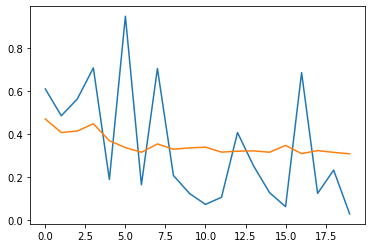

In [228]:
plt.plot(eps,t_loss)
plt.plot(eps,d_loss)
plt.show()

In [248]:
torch.save(net.state_dict(), 'sstcls_{}.dat'.format(ep))